<a href="https://colab.research.google.com/github/neonninja-9/ML-MODELS/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load dataset
df = pd.read_csv("/content/placement-dataset.csv")

In [3]:
# Step 3: Explore data
print(df.shape)
print(df.info())
print(df.head())

(100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    int64  
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
   cgpa   iq  placement
0   6.8  123          1
1   5.9  106          0
2   5.3  121          0
3   7.4  132          1
4   5.8  142          0


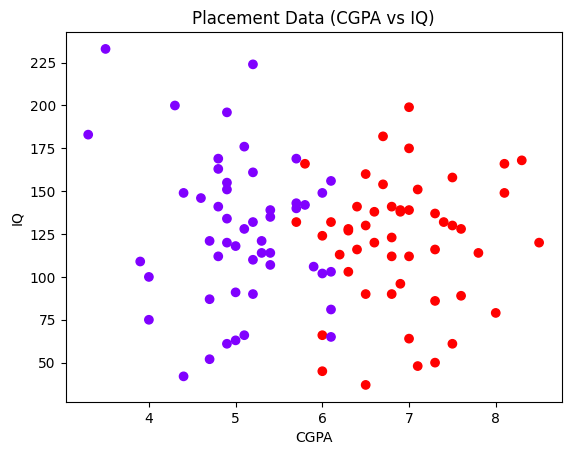

In [4]:
# Step 4: Scatter plot
plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='rainbow')
plt.title("Placement Data (CGPA vs IQ)")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()


In [5]:
# Step 5: Define features (X) and target (y)
X = df.iloc[:, 0:2]    # CGPA, IQ
y = df.iloc[:, -1]     # Placement (target)

print(X.head())
print(y.head())


   cgpa   iq
0   6.8  123
1   5.9  106
2   5.3  121
3   7.4  132
4   5.8  142
0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64


In [6]:
# Step 6: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [7]:
# Step 7: Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Step 8: Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Step 9: Predictions
y_pred = clf.predict(X_test)


In [10]:
# Step 10: Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


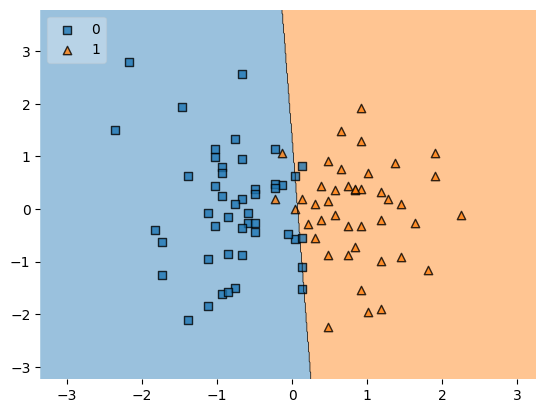

In [11]:
# Step 11: Visualize decision boundary
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
plt.show()


In [12]:
# Step 12: Save model with pickle
import pickle
pickle.dump(clf, open("model.pkl", "wb"))